In [1]:
using CSV, DataFrames, Pkg, StatsBase, StatsPlots, Dates, Statistics

In [29]:
Pkg.add("StatsPlots")

   Resolving package versions...
   Installed HypergeometricFunctions ─ v0.3.28
   Installed StatsFuns ─────────────── v1.5.2
   Installed PDMats ────────────────── v0.11.36
   Installed IntelOpenMP_jll ───────── v2025.2.0+0
   Installed OffsetArrays ──────────── v1.17.0
   Installed FFTW ──────────────────── v1.10.0
   Installed NearestNeighbors ──────── v0.4.24
   Installed StaticArrays ──────────── v1.9.15
   Installed Rmath_jll ─────────────── v0.5.1+0
   Installed StatsPlots ────────────── v0.15.8
   Installed Ratios ────────────────── v0.4.5
   Installed MKL_jll ───────────────── v2025.2.0+0
   Installed oneTBB_jll ────────────── v2022.0.0+1
   Installed AbstractFFTs ──────────── v1.5.0
   Installed ChainRulesCore ────────── v1.26.0
   Installed KernelDensity ─────────── v0.6.10
   Installed FFTW_jll ──────────────── v3.3.11+0
   Installed Clustering ────────────── v0.15.8
   Installed Widgets ───────────────── v0.6.7
   Installed Rmath ─────────────────── v0.9.0
   Installed Mul

In [2]:
raw_df = CSV.read("bike_ped_counts.csv", DataFrame; stringtype=String)

┌ Warning: thread = 1 warning: parsed expected 73 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV C:\Users\maxsu\.julia\packages\CSV\XLcqT\src\file.jl:593


Row,id,bp_loc_id,count_id,town,description,temperature,sky,count_type,from_st_name,from_st_dir,to_st_name,to_st_dir,count_date,count_dow,cnt_0630,cnt_0645,cnt_0700,cnt_0715,cnt_0730,cnt_0745,cnt_0800,cnt_0815,cnt_0830,cnt_0845,cnt_0900,cnt_0915,cnt_0930,cnt_0945,cnt_1000,cnt_1015,cnt_1030,cnt_1045,cnt_1100,cnt_1115,cnt_1130,cnt_1145,cnt_1200,cnt_1215,cnt_1230,cnt_1245,cnt_1300,cnt_1315,cnt_1330,cnt_1345,cnt_1400,cnt_1415,cnt_1430,cnt_1445,cnt_1500,cnt_1515,cnt_1530,cnt_1545,cnt_1600,cnt_1615,cnt_1630,cnt_1645,cnt_1700,cnt_1715,cnt_1730,cnt_1745,cnt_1800,cnt_1815,cnt_1830,cnt_1845,cnt_1900,cnt_1915,cnt_1930,cnt_1945,cnt_2000,cnt_2015,cnt_2030,cnt_2045,cnt_total,Column74
,Int64,Int64,Int64,String,String?,Int64,Int64,String,String?,String?,String?,String?,Date,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Missing
1,1,20016,7001,Brookline,missing,56,3,B,Harvard St.,NB,Beacon St.,WB,1974-03-05,Tue,0,0,0,0,0,0,1,0,2,0,1,0,0,0,0,0,1,1,0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,2,1,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,19,missing
2,2,20016,7001,Brookline,missing,56,3,B,Harvard St.,NB,Harvard St.,NB,1974-03-05,Tue,0,0,1,1,0,2,0,0,1,1,1,0,2,0,1,4,0,0,0,0,0,0,2,0,0,0,1,3,2,2,1,2,1,1,2,4,1,0,3,5,6,4,6,8,4,6,2,2,5,1,0,0,0,0,0,0,0,0,88,missing
3,3,20016,7001,Brookline,missing,56,3,B,Harvard St.,NB,Beacon St.,EB,1974-03-05,Tue,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,2,0,1,0,0,0,0,0,0,0,0,0,13,missing
4,4,20016,7001,Brookline,missing,56,3,B,Beacon St.,EB,Harvard St.,SB,1974-03-05,Tue,0,0,1,0,2,1,4,3,1,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,missing
5,5,20016,7001,Brookline,missing,56,3,B,Beacon St.,EB,Beacon St.,EB,1974-03-05,Tue,0,0,2,1,3,5,8,9,6,5,4,6,3,2,1,3,0,1,0,0,1,3,0,0,0,0,1,1,0,2,3,1,1,1,2,1,0,1,2,1,0,1,2,4,0,1,1,1,2,1,0,0,0,0,0,0,0,0,93,missing
6,6,20016,7001,Brookline,missing,56,3,B,Beacon St.,EB,Harvard St.,NB,1974-03-05,Tue,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,2,3,2,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,19,missing
7,7,20016,7001,Brookline,missing,56,3,B,Beacon St.,WB,Harvard St.,NB,1974-03-05,Tue,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,1,1,0,1,0,0,0,0,0,0,0,0,11,missing
8,8,20016,7001,Brookline,missing,56,3,B,Beacon St.,WB,Beacon St.,WB,1974-03-05,Tue,0,0,1,0,2,0,0,0,1,0,1,0,2,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1,2,0,0,0,4,2,3,1,2,2,1,2,4,5,8,9,5,3,2,3,1,3,0,0,0,0,0,0,0,0,76,missing
9,9,20016,7001,Brookline,missing,56,3,B,Beacon St.,WB,Harvard St.,SB,1974-03-05,Tue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,2,2,1,0,0,1,0,0,2,1,1,1,3,1,1,0,0,0,0,0,0,0,0,0,19,missing


In [3]:
unique(raw_df.count_type)

8-element Vector{String}:
 "B"
 "P"
 "J"
 "S"
 "C"
 "O"
 "W"
 "A"

In [4]:
countmap(raw_df.count_type)

Dict{String, Int64} with 8 entries:
  "B" => 4349
  "J" => 641
  "S" => 689
  "W" => 523
  "P" => 921
  "C" => 554
  "A" => 4
  "O" => 547

# count_type Value Meanings

B: Bicycle, P: Pedestrian, J: Jogger, S: Small wheels (scooter/skating/skate board), W: Wheelchair, C: Child, O: Other, A: Adult (some BS)

In [5]:
# Let's look at how many locations there are 
countmap(raw_df.bp_loc_id)

Dict{Int64, Int64} with 274 entries:
  20073 => 9
  20192 => 5
  20277 => 36
  20046 => 21
  20031 => 14
  20283 => 7
  20166 => 7
  20123 => 12
  20272 => 4
  20176 => 21
  20221 => 6
  20190 => 230
  20171 => 7
  10528 => 76
  20105 => 12
  20198 => 12
  20055 => 28
  20194 => 5
  20130 => 6
  20237 => 4
  20136 => 7
  20033 => 49
  11015 => 19
  20097 => 100
  20267 => 4
  ⋮     => ⋮

In [6]:
# Let's look at total activity per location, each day
total_counts = combine(
    groupby(raw_df, [:bp_loc_id, :count_type, :count_date]),
    :cnt_total => sum => :loc_total
)
total_counts

Row,bp_loc_id,count_type,count_date,loc_total
,Int64,String,Date,Int64
1,20016,B,1974-03-05,478
2,20016,B,1974-03-08,1001
3,20014,B,1975-10-09,904
4,10127,B,1975-10-09,376
5,10528,B,1975-10-09,213
6,10432,B,1975-10-09,167
7,20016,B,1975-10-09,420
8,341,B,1975-10-09,813
9,20030,B,1975-10-09,109


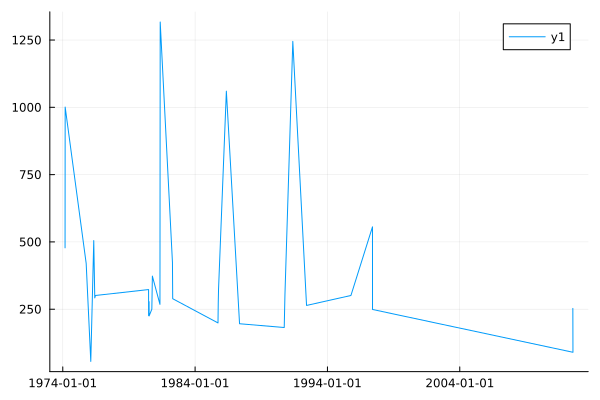

In [7]:
selected_loc = 20016
selected_type = "B"

mask = (total_counts[:,:bp_loc_id] .== selected_loc) .&& (total_counts[:,:count_type] .== selected_type)
selected_df = total_counts[mask, :]

@df selected_df plot(:count_date, :loc_total)

In [8]:
selected_df[selected_df[:,:loc_total] .> 750,:]

Row,bp_loc_id,count_type,count_date,loc_total
,Int64,String,Date,Int64
1,20016,B,1974-03-08,1001
2,20016,B,1981-05-13,1317
3,20016,B,1986-05-13,1060
4,20016,B,1991-05-21,1245


In [9]:
selected_df

Row,bp_loc_id,count_type,count_date,loc_total
,Int64,String,Date,Int64
1,20016,B,1974-03-05,478
2,20016,B,1974-03-08,1001
3,20016,B,1975-10-09,420
4,20016,B,1976-02-13,56
5,20016,B,1976-05-05,505
6,20016,B,1976-06-02,292
7,20016,B,1976-06-21,301
8,20016,B,1980-06-26,323
9,20016,B,1980-06-27,226


In [10]:
# Have literal total counts gone up or down over time? Let's first see how uniform the data is
countmap(total_counts.count_date)

Dict{Date, Int64} with 334 entries:
  Date("2010-09-18") => 7
  Date("2020-05-12") => 7
  Date("2010-06-26") => 21
  Date("2005-03-22") => 1
  Date("2017-05-17") => 9
  Date("2013-05-07") => 35
  Date("1974-03-05") => 1
  Date("2005-05-14") => 24
  Date("2008-07-15") => 98
  Date("2018-09-11") => 17
  Date("1998-07-11") => 6
  Date("2001-08-01") => 3
  Date("2014-09-10") => 12
  Date("1978-07-13") => 3
  Date("2014-06-18") => 6
  Date("2017-05-21") => 2
  Date("1981-05-06") => 2
  Date("2012-09-22") => 14
  Date("2019-09-06") => 7
  Date("1995-10-11") => 4
  Date("1994-10-22") => 6
  Date("2016-07-20") => 2
  Date("1981-05-21") => 7
  Date("2011-05-07") => 14
  Date("2019-06-11") => 28
  ⋮                  => ⋮

In [15]:
# Dates def not uniform, let's look at distributions of linreg slopes?
mode_of_t = unique(total_counts.count_type)
slopes = Dict(m => Vector{Any}() for m in mode_of_t)

for mode in mode_of_t
    for loc_id in unique(total_counts.bp_loc_id)
        relevant_counts = total_counts[(total_counts.count_type .== mode) .&& (total_counts.bp_loc_id .== loc_id),:]
        if size(relevant_counts, 1) <= 4
            continue
        end
        x = Dates.value.(relevant_counts.count_date) .- minimum(Dates.value.(relevant_counts.count_date))
        y = relevant_counts.loc_total
        slope = cov(x,y)/var(x)

        push!(slopes[mode], slope)
    end
end

In [12]:
slopes

Dict{String, Vector{Any}} with 8 entries:
  "B" => [-0.0132858, 5.04927e-5, 0.0145062, 0.0127287, -1.01575, -0.0366794, -…
  "J" => [3.0, 0.333333, 12.0, 0.00906437, 0.0947891, -0.0411488, 0.0, 0.037682…
  "S" => [1.33333, 0.0, 0.00549451, -0.0231278, 0.0, -0.882353, -0.00121305, 0.…
  "W" => [5.33333, 0.0, 0.0, 0.0, 0.0, -0.000176087, 0.0, -0.000124038, -0.0005…
  "P" => [55.6667, 0.00275087, 169.0, -0.0124742, -0.00529497, -0.00800933, -0.…
  "C" => [13.6667, 3.0, 0.00824176, 0.0549211, 0.0, -0.000352175, -0.000110828,…
  "A" => [0.0168553]
  "O" => [-0.333333, 0.0, -0.00274725, 0.0, -1.58824, -0.000528262, 0.00258342,…

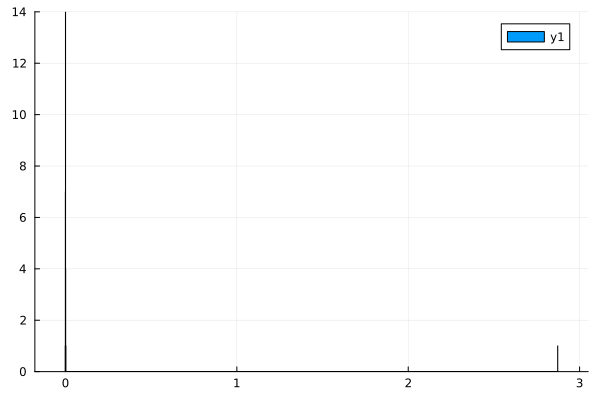

In [19]:
histogram(slopes["W"])

In [17]:
mean(slopes["W"])

0.10271375653215457

In [18]:
var(slopes["W"])

0.29457488347178834

In [20]:
mean(slopes["B"]), var(slopes["B"])

(1.6946219097321074, 150.49317558132395)

In [24]:
mode = "W"
total_locs = 0
for loc_id in unique(total_counts.bp_loc_id)
    relevant_counts = total_counts[(total_counts.count_type .== mode) .&& (total_counts.bp_loc_id .== loc_id),:]
    if size(relevant_counts, 1) === 0
        continue
    else
        total_locs += 1
    end
end

total_locs

100